In [1]:
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')
  incolab = True  
else:
  incolab = False 

%load_ext autoreload
%autoreload 2

In [2]:

#Required packages
import pandas as pd

# Modelflow modules
from modelclass import model
from modelmf import model

   
#for publication 
latex=0
model.widescreen()

In [3]:

fsolow = '''\
GDP          = TFP  * Capital**alfa * Labor **(1-alfa) 
Consumption     = (1-saving_rate)  * GDP 
Investment      = GDP - Consumption   
diff(Capital)   = Investment-Depreciation_rate * Capital(-1)
diff(Labor)     = Labor_growth * Labor(-1)  
Capital_intensity = Capital/Labor 
'''

In [4]:
msolow = model.from_eq(fsolow,modelname='Solow model')

In [5]:
msolow.print_model

FRML <> GDP          = TFP  * CAPITAL**ALFA * LABOR **(1-ALFA)  $
FRML <> CONSUMPTION     = (1-SAVING_RATE)  * GDP  $
FRML <> INVESTMENT      = GDP - CONSUMPTION    $
FRML <> CAPITAL=CAPITAL(-1)+(INVESTMENT-DEPRECIATION_RATE * CAPITAL(-1))$
FRML <> LABOR=LABOR(-1)+(LABOR_GROWTH * LABOR(-1))$
FRML <> CAPITAL_INTENSITY = CAPITAL/LABOR  $


In [6]:
N = 300  
df = pd.DataFrame({'LABOR':[100]*N,
                   'CAPITAL':[100]*N, 
                   'ALFA':[0.5]*N, 
                   'TFP': [1]*N, 
                   'DEPRECIATION_RATE': [0.05]*N, 
                   'LABOR_GROWTH': [0.01]*N, 
                   'SAVING_RATE':[0.05]*N},index=[v for v in range(2000,2300)])
df.head() #this prints out the first 5 rows of the dataframe

,LABOR,CAPITAL,ALFA,TFP,DEPRECIATION_RATE,LABOR_GROWTH,SAVING_RATE
2000,100,100,0.5,1,0.05,0.01,0.05
2001,100,100,0.5,1,0.05,0.01,0.05
2002,100,100,0.5,1,0.05,0.01,0.05
2003,100,100,0.5,1,0.05,0.01,0.05
2004,100,100,0.5,1,0.05,0.01,0.05


In [7]:
result = msolow(df,keep='Baseline') 
# The model is simulated for all years possible 

result.head(10)

,LABOR,CAPITAL,ALFA,TFP,DEPRECIATION_RATE,LABOR_GROWTH,SAVING_RATE,CAPITAL_INTENSITY,CONSUMPTION,GDP,INVESTMENT
2000,100.000000,100.000000,0.5,1.0,0.05,0.01,0.05,0.000000,0.000000,0.000000,0.000000
2001,101.000000,100.025580,0.5,1.0,0.05,0.01,0.05,0.990352,95.486029,100.511609,5.025580
2002,102.010000,100.076226,0.5,1.0,0.05,0.01,0.05,0.981043,95.986562,101.038487,5.051924
2003,103.030100,100.151443,0.5,1.0,0.05,0.01,0.05,0.972060,96.501546,101.580575,5.079029
2004,104.060401,100.250762,0.5,1.0,0.05,0.01,0.05,0.963390,97.030930,102.137821,5.106891
2005,105.101005,100.373733,0.5,1.0,0.05,0.01,0.05,0.955022,97.574667,102.710176,5.135509
2006,106.152015,100.519926,0.5,1.0,0.05,0.01,0.05,0.946943,98.132713,103.297593,5.164880
2007,107.213535,100.688931,0.5,1.0,0.05,0.01,0.05,0.939144,98.705029,103.900030,5.195002
2008,108.285671,100.880357,0.5,1.0,0.05,0.01,0.05,0.931613,99.291576,104.517449,5.225872
2009,109.368527,101.093830,0.5,1.0,0.05,0.01,0.05,0.924341,99.892323,105.149813,5.257491


In [8]:
dfscenario = df.mfcalc('<2023 2200> LABOR_GROWTH = LABOR_GROWTH + 0.002')  # create a new dataframe, increase LABOR_GROWTH by 0.002
scenario   = msolow(dfscenario,keep='Higher labor growth ') # simulate the model 


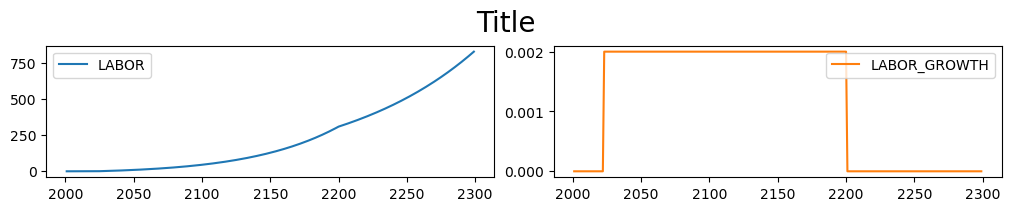

In [9]:
msolow['labor*'].dif.plot() 

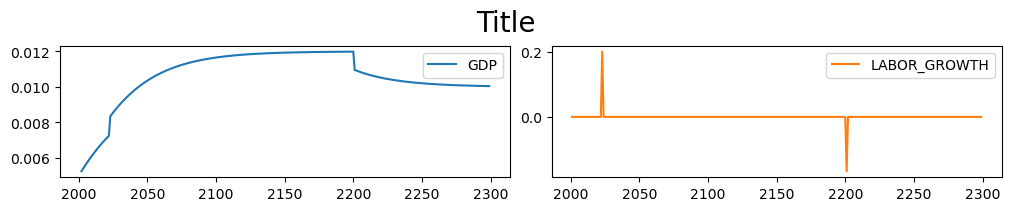

In [10]:
msolow['GDP LABOR_GROWTH'].pct.plot() 

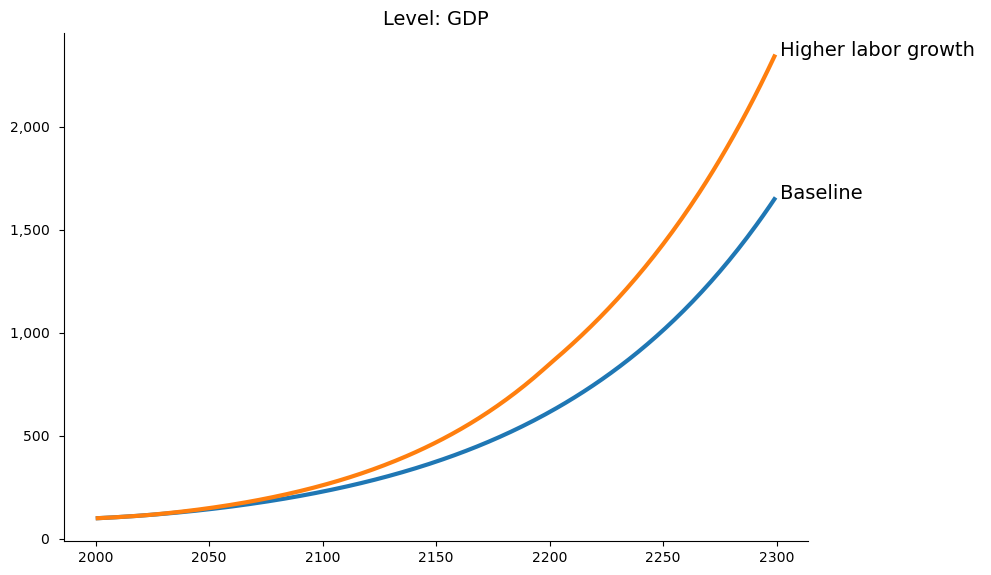

In [11]:

msolow.keep_plot('GDP');
    

In [12]:
msolow.lastdf.loc[2000:2100:10,'CONSUMPTION']

2000      0.000000
2010    100.507238
2020    107.431233
2030    116.791578
2040    128.304359
2050    141.874040
2060    157.652568
2070    175.830726
2080    196.639578
2090    220.352686
2100    247.289125
Name: CONSUMPTION, dtype: float64

In [13]:
msolow['GDP CONSUMPTION'].dif.df

,GDP,CONSUMPTION
2001,0.000000,0.000000
2002,0.000000,0.000000
2003,0.000000,0.000000
2004,0.000000,0.000000
2005,0.000000,0.000000
...,...,...
2295,665.334581,632.067852
2296,672.097592,638.492713
2297,678.925939,644.979642
2298,685.820324,651.529308


In [14]:
msolow['GDP CONSUMPTION'].difpct.mul100.df

,GDP,CONSUMPTION
2001,NaN,NaN
2002,0.000000,0.000000
2003,0.000000,0.000000
2004,0.000000,0.000000
2005,0.000000,0.000000
...,...,...
2295,0.005047,0.005047
2296,0.004892,0.004892
2297,0.004742,0.004742
2298,0.004596,0.004596


In [15]:
msolow['GDP CONSUMPTION']
